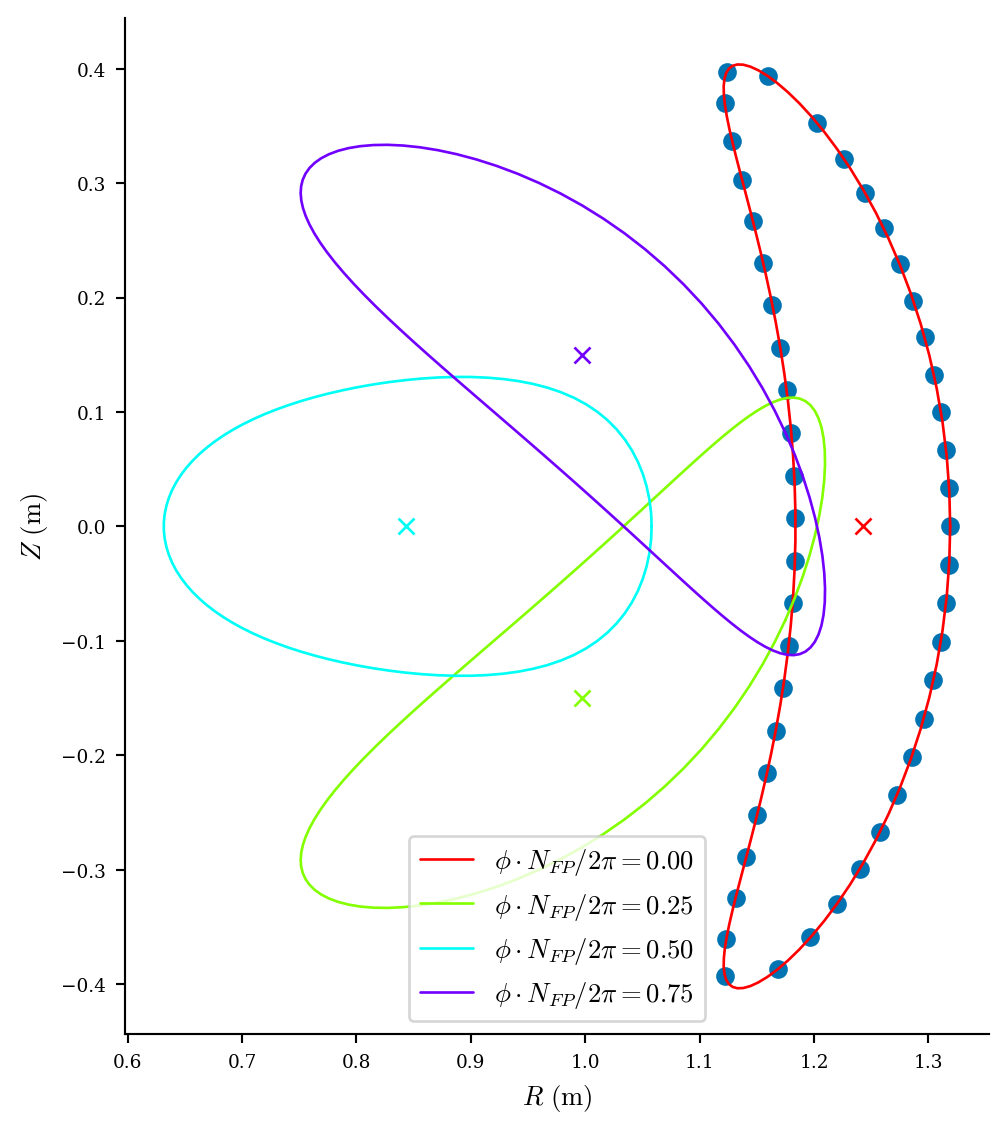

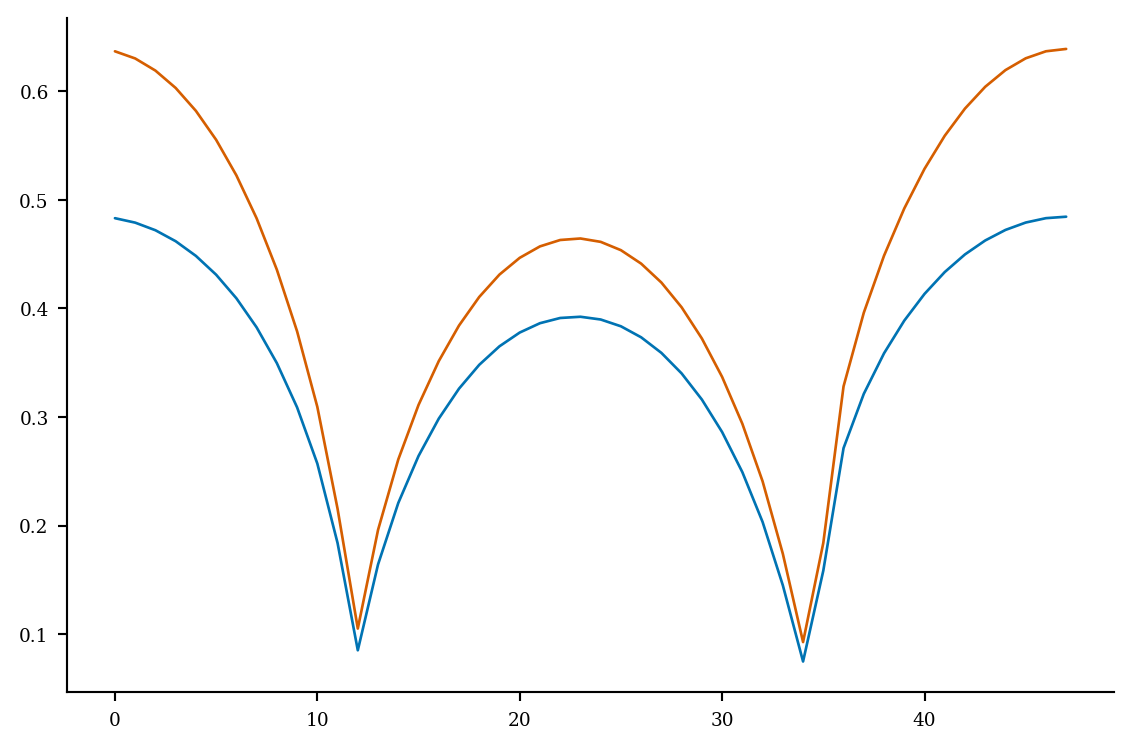

In [209]:
import desc.examples
from desc.plotting import plot_3d, plot_boundary
from desc.grid import LinearGrid
import numpy as np
import matplotlib.pyplot as plt

eq = desc.examples.get("precise_QA")
surface = eq.surface
axis = eq.get_axis()

fig, ax1 = plot_boundary(eq)

angles = np.linspace(0.0, np.pi * 2, 48, endpoint=False)
points = eq.surface.compute(["R", "Z", "e_theta", "|e_theta x e_zeta|"], grid=LinearGrid(rho=[1.0], theta=angles, zeta=[0.0]))
angles = np.pi * 2 * np.cumsum(1.0/points["|e_theta x e_zeta|"]) / np.sum(1.0/points["|e_theta x e_zeta|"])
points = eq.surface.compute(["R", "Z", "e_theta", "|e_theta x e_zeta|"], grid=LinearGrid(rho=[1.0], theta=angles, zeta=[0.0]))
angles = np.pi * 2 * np.cumsum(1.0/points["|e_theta x e_zeta|"]) / np.sum(1.0/points["|e_theta x e_zeta|"])
points = eq.surface.compute(["R", "Z", "e_theta", "|e_theta x e_zeta|"], grid=LinearGrid(rho=[1.0], theta=angles, zeta=[0.0]))
angles = np.pi * 2 * np.cumsum(1.0/points["|e_theta x e_zeta|"]) / np.sum(1.0/points["|e_theta x e_zeta|"])
points = eq.surface.compute(["R", "Z", "e_theta", "|e_theta x e_zeta|"], grid=LinearGrid(rho=[1.0], theta=angles, zeta=[0.0]))
points_rz = np.c_[points["R"], points["Z"]]

ax1.scatter(points_rz[:,0], points_rz[:,1])

plt.show()

# plt.plot(points[:,2])
e_theta = np.linalg.norm(points["e_theta"], axis=1)
plt.plot(e_theta)
plt.plot(points["|e_theta x e_zeta|"])
plt.show()

[0.63898001 0.6387333  0.63832209 ... 0.62125683 0.62091055 0.62040292]


(<Figure size 576.072x576.072 with 1 Axes>,
 <Axes: xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>)

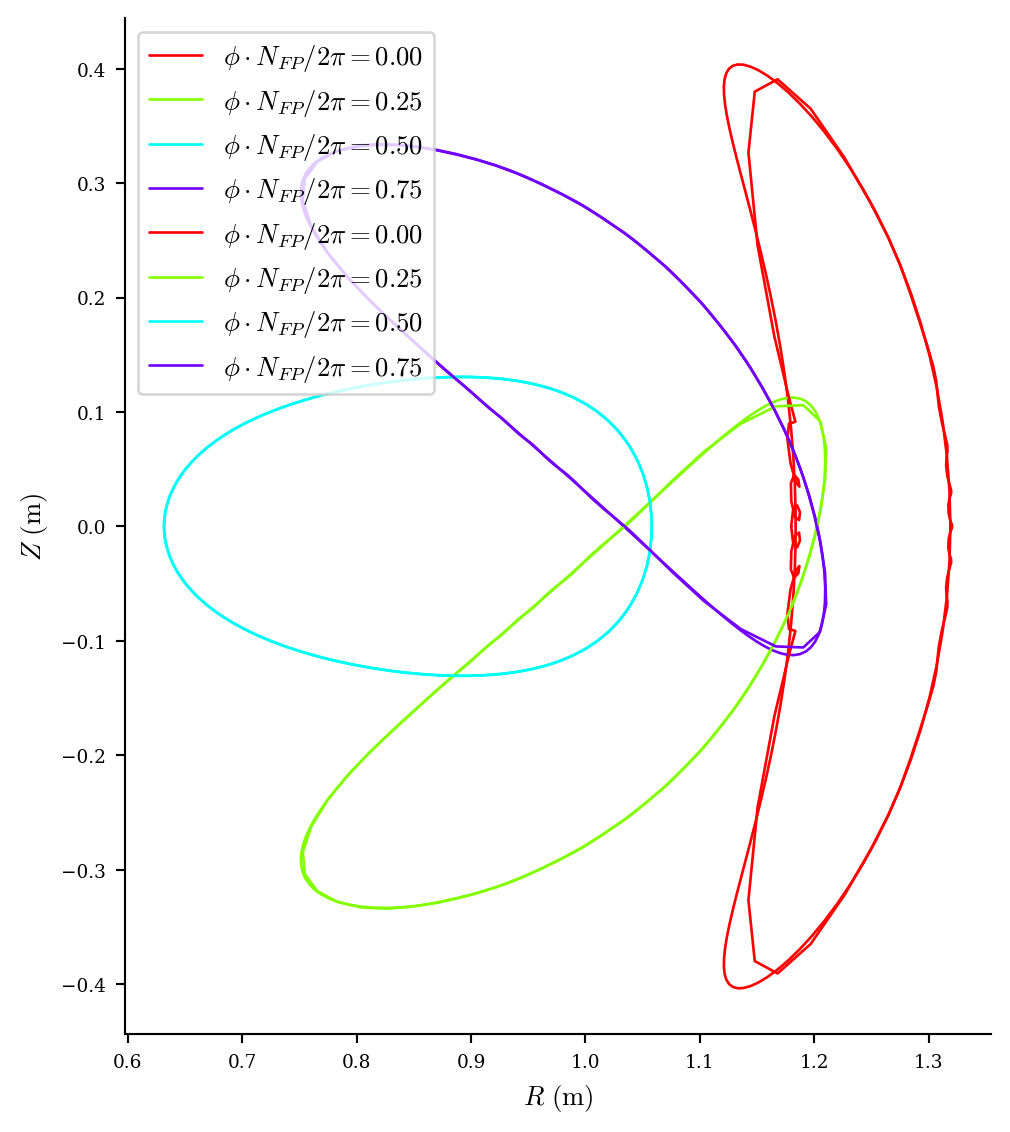

In [217]:
from desc.geometry import FourierRZToroidalSurface
from desc.grid import Grid

angles = np.tile(np.linspace(0.0, np.pi * 2, eq.surface.M*32, endpoint=False), eq.surface.N*4)
angles_z = np.linspace(0.0, np.pi * 2, eq.surface.N*4, endpoint=False).repeat(eq.surface.M*32)
points = eq.surface.compute(["R", "Z", "e_theta", "|e_theta x e_zeta|"], grid=Grid(nodes=np.c_[np.ones_like(angles), angles, angles_z]))
angles = np.pi * 2 * np.cumsum(1.0/points["|e_theta x e_zeta|"].reshape(eq.surface.N*4, eq.surface.M*32), axis=1) / np.sum(1.0/points["|e_theta x e_zeta|"].reshape(eq.surface.N*4, eq.surface.M*32), axis=1, keepdims=True)
angles = angles.flatten()
points = eq.surface.compute(["R", "Z", "e_theta", "|e_theta x e_zeta|"], grid=Grid(nodes=np.c_[np.ones_like(angles), angles, angles_z]))
angles = np.pi * 2 * np.cumsum(1.0/points["|e_theta x e_zeta|"].reshape(eq.surface.N*4, eq.surface.M*32), axis=1) / np.sum(1.0/points["|e_theta x e_zeta|"].reshape(eq.surface.N*4, eq.surface.M*32), axis=1, keepdims=True)
angles = angles.flatten()



grid = Grid(nodes=np.c_[np.ones_like(angles), angles, angles_z])
points = eq.surface.compute(["R", "phi", "Z", "theta", "|e_theta x e_zeta|"], grid=grid)
axis = eq.get_axis().compute(["R", "Z"], grid=LinearGrid(zeta=angles_z))
axis = np.c_[axis["R"], axis["Z"]]
points_offset = np.c_[points["R"], points["Z"]] - axis
theta = np.arctan2(points_offset[:,1], -points_offset[:,0])
# plt.plot(np.diff(theta))
# plt.show()

new_surf = FourierRZToroidalSurface.from_values(np.c_[points["R"], points["phi"], points["Z"]], theta=theta, NFP=eq.surface.NFP, N=eq.surface.N, M=16, w=points["|e_theta x e_zeta|"])

print(points["|e_theta x e_zeta|"])
# print(points[:,1])
# np.set_printoptions(edgeitems=100)
# print(np.c_[theta, points[:,3]])

_, ax1 = plot_boundary(surface)
plot_boundary(new_surf, ax=ax1)

/Users/andy/.pyenv/versions/topax-dev/lib/python3.13/site-packages/desc/utils.py:572: UserWarning: Unequal number of field periods for grid 1 and basis 2.
  warnings.warn(msg, err)
/Users/andy/.pyenv/versions/topax-dev/lib/python3.13/site-packages/desc/utils.py:572: UserWarning: Unequal number of field periods for grid 1 and basis 2.
  warnings.warn(msg, err)


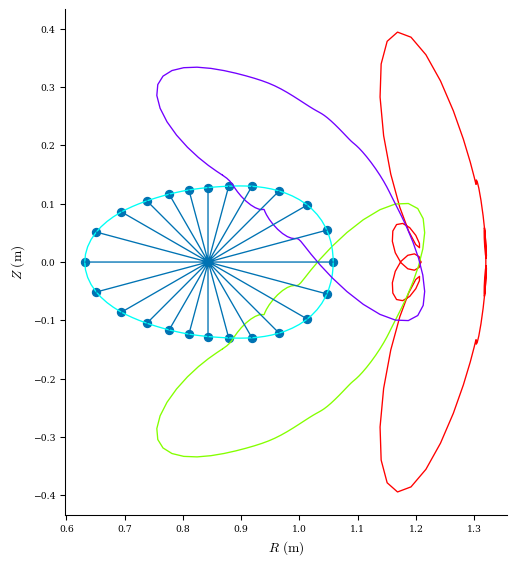

In [84]:
# plot_3d(eq, "B")
fig, ax1 = plot_boundary(new_surf)

angles = np.linspace(0.0, np.pi * 2, 24, endpoint=False)
points = new_surf.compute(["R", "Z"], grid=LinearGrid(rho=[1.0], theta=angles, zeta=[np.pi/2]))
points = np.c_[points["R"], points["Z"]]
points_combined = np.zeros((points.shape[0]//2 * 3, 2))
points_combined[::3] = points[:points.shape[0]//2]
points_combined[1::3] = points[points.shape[0]//2:]
points_combined[2::3] = np.nan

ax1.scatter(points[:,0], points[:,1])
ax1.plot(points_combined[:,0], points_combined[:,1])
# ax1.scatter(3.51, 0)

axis = eq.get_axis()
axis_points = axis.compute(["R", "Z"], grid=LinearGrid(zeta=[np.pi/2]))
axis_points = np.c_[axis_points["R"], axis_points["Z"]]

# axis_centered_points = points - axis_points
# print(angles)
# print(-np.arctan2(axis_centered_points[:,1], axis_centered_points[:,0]))

plt.scatter(axis_points[:,0], axis_points[:,1])

ax1.legend().set_visible(False)
plt.show()

/Users/andy/.pyenv/versions/topax-dev/lib/python3.13/site-packages/desc/utils.py:572: UserWarning: Unequal number of field periods for grid 1 and basis 2.
  warnings.warn(msg, err)
/Users/andy/.pyenv/versions/topax-dev/lib/python3.13/site-packages/desc/utils.py:572: UserWarning: Unequal number of field periods for grid 1 and basis 2.
  warnings.warn(msg, err)


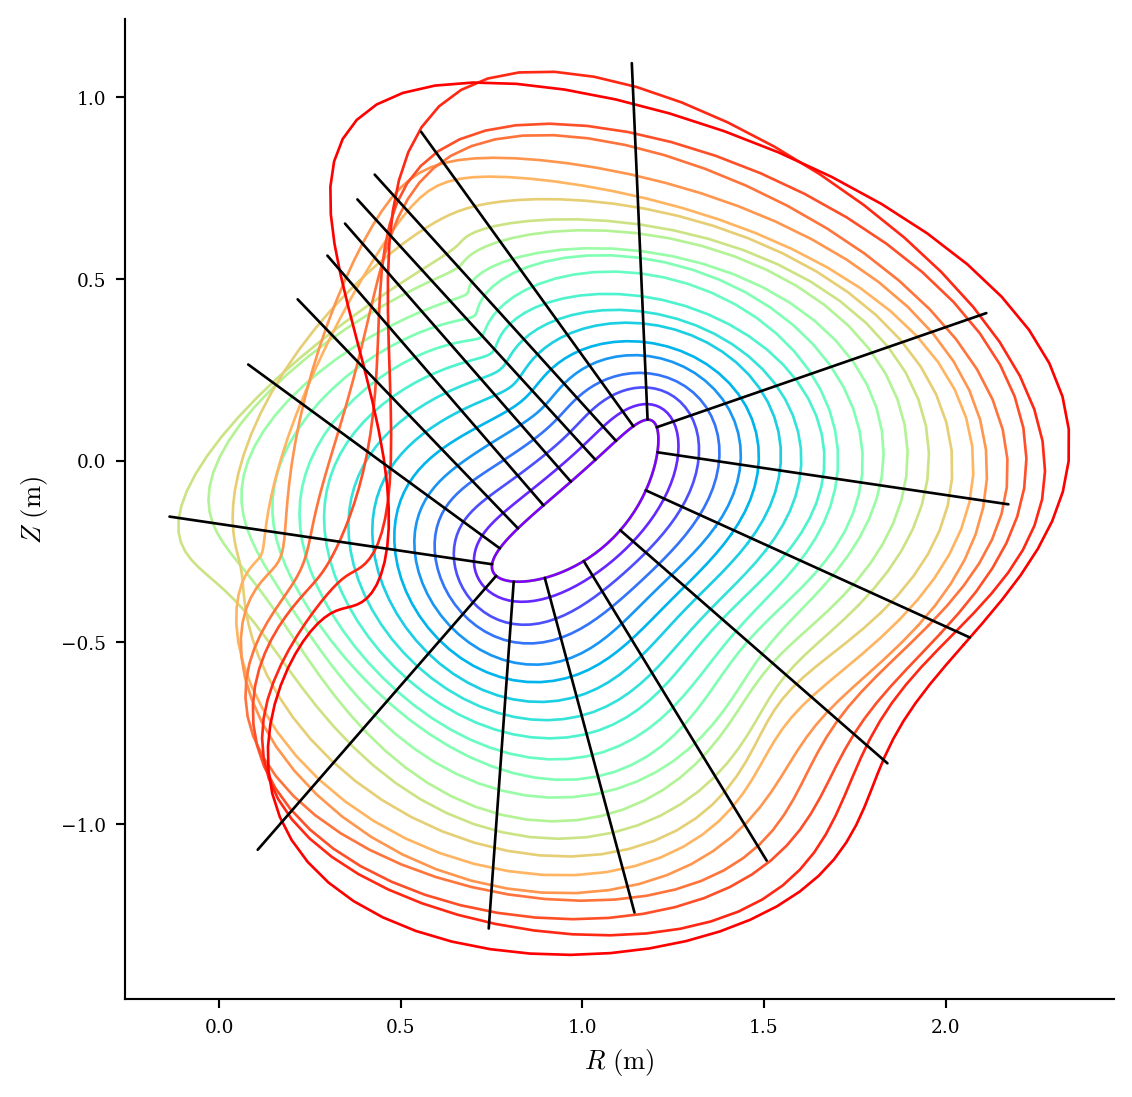

In [111]:
from desc.plotting import plot_3d, plot_boundaries
%config InlineBackend.figure_format = 'retina'

eq = desc.examples.get("precise_QA")
surface = eq.surface

# surfaces = [surface.constant_offset_surface(x) for x in np.linspace(0.1, 0, 10)]
# plot_boundaries(surfaces)

# print(surface.M, surface.N)

offset_surfaces = [surface.constant_offset_surface(
    offset=x,
    M=4,  # Poloidal resolution of desired offset surface
    N=4,  # Toroidal resolution of desired offset surface
    grid=LinearGrid(M=8, N=8, NFP=eq.NFP, sym=False)
) for x in np.arange(21) / 20.0]


phi = np.pi/4
fig, ax1 = plot_boundary(surface, phi=phi)
plot_boundaries(offset_surfaces, ax=ax1, phi=phi)
ax1.legend().set_visible(False)

normals = surface.compute(["R", "Z", "n_rho"], grid=LinearGrid(rho=[1.0], zeta=[phi], M=8))

for i in range(normals["R"].shape[0]):
    plt.plot([normals["R"][i], normals["R"][i] + normals["n_rho"][i,0]], [normals["Z"][i], normals["Z"][i] + normals["n_rho"][i,2]], c='k')

In [184]:
from desc.backend import (
    block_diag,
    execute_on_cpu,
    jit,
    jnp,
    put,
    root_scalar,
    sign,
    vmap,
)
from desc.utils import (
    check_nonnegint,
    check_posint,
    copy_coeffs,
    errorif,
    rpz2xyz_vec,
    setdefault,
    xyz2rpz,
    xyz2rpz_vec,
)
from desc.grid import Grid

def constant_offset_surface(
        eq, offset, grid=None, M=None, N=None, full_output=False
    ):
        M = check_nonnegint(M, "M")
        N = check_nonnegint(N, "N")

        base_surface = eq.surface
        mag_axis = eq.get_axis()
        if grid is None:
            grid = LinearGrid(
                M=base_surface.M * 2,
                N=base_surface.N * 2,
                NFP=base_surface.NFP,
                sym=base_surface.sym,
            )
        assert isinstance(
            base_surface, FourierRZToroidalSurface
        ), "base_surface must be a FourierRZToroidalSurface!"
        M = base_surface.M if M is None else int(M)
        N = base_surface.N if N is None else int(N)

        def n_and_r_jax(nodes):
            data = base_surface.compute(
                ["X", "Y", "Z", "n_rho", "curvature_k2_rho"],
                grid=Grid(nodes, jitable=True, sort=False),
                method="jitable",
            )

            center_p = mag_axis.compute(
                ["X", "Y", "Z"],
                grid=Grid(nodes, jitable=True, sort=False),
                method="jitable",
            )
            center_p = jnp.c_[center_p["X"], center_p["Y"], center_p["Z"]]

            phi = nodes[:, 2]
            re = jnp.vstack([data["X"], data["Y"], data["Z"]]).T
            n = data["n_rho"]
            n = rpz2xyz_vec(n, phi=phi)
            rays = re - center_p
            rays = rays / jnp.linalg.norm(rays, axis=1, keepdims=True)
            rays = jnp.sum(rays * n, axis=1, keepdims=True)
            n = n.at[:, 2].set(n[:,2] * (data["curvature_k2_rho"] < 0.0))
            r_offset = re + offset * n * (jnp.maximum(data["curvature_k2_rho"][:,jnp.newaxis], 0.0) * 0.6 + 1.0)
            return n, re, r_offset

        def fun_jax(zeta_hat, theta, zeta):
            nodes = jnp.vstack((jnp.ones_like(theta), theta, zeta_hat)).T
            n, r, r_offset = n_and_r_jax(nodes)
            return jnp.arctan(r_offset[0, 1] / r_offset[0, 0]) - zeta

        vecroot = jit(
            vmap(
                lambda x0, *p: root_scalar(
                    fun_jax, x0, jac=None, args=p, full_output=full_output
                )
            )
        )
        if full_output:
            zetas, (res, niter) = vecroot(
                grid.nodes[:, 2], grid.nodes[:, 1], grid.nodes[:, 2]
            )
        else:
            zetas = vecroot(grid.nodes[:, 2], grid.nodes[:, 1], grid.nodes[:, 2])

        zetas = np.asarray(zetas)
        nodes = np.vstack((np.ones_like(grid.nodes[:, 1]), grid.nodes[:, 1], zetas)).T
        n, x, x_offsets = n_and_r_jax(nodes)

        data = {}
        data["n"] = xyz2rpz_vec(n, phi=nodes[:, 1])
        data["x"] = xyz2rpz(x)
        data["x_offset_surface"] = xyz2rpz(x_offsets)

        offset_surface = FourierRZToroidalSurface.from_values(
            data["x_offset_surface"],
            theta=nodes[:, 1],
            M=M,
            N=N,
            NFP=base_surface.NFP,
            sym=base_surface.sym,
        )
        if full_output:
            return offset_surface, data, (res, niter)
        else:
            return offset_surface

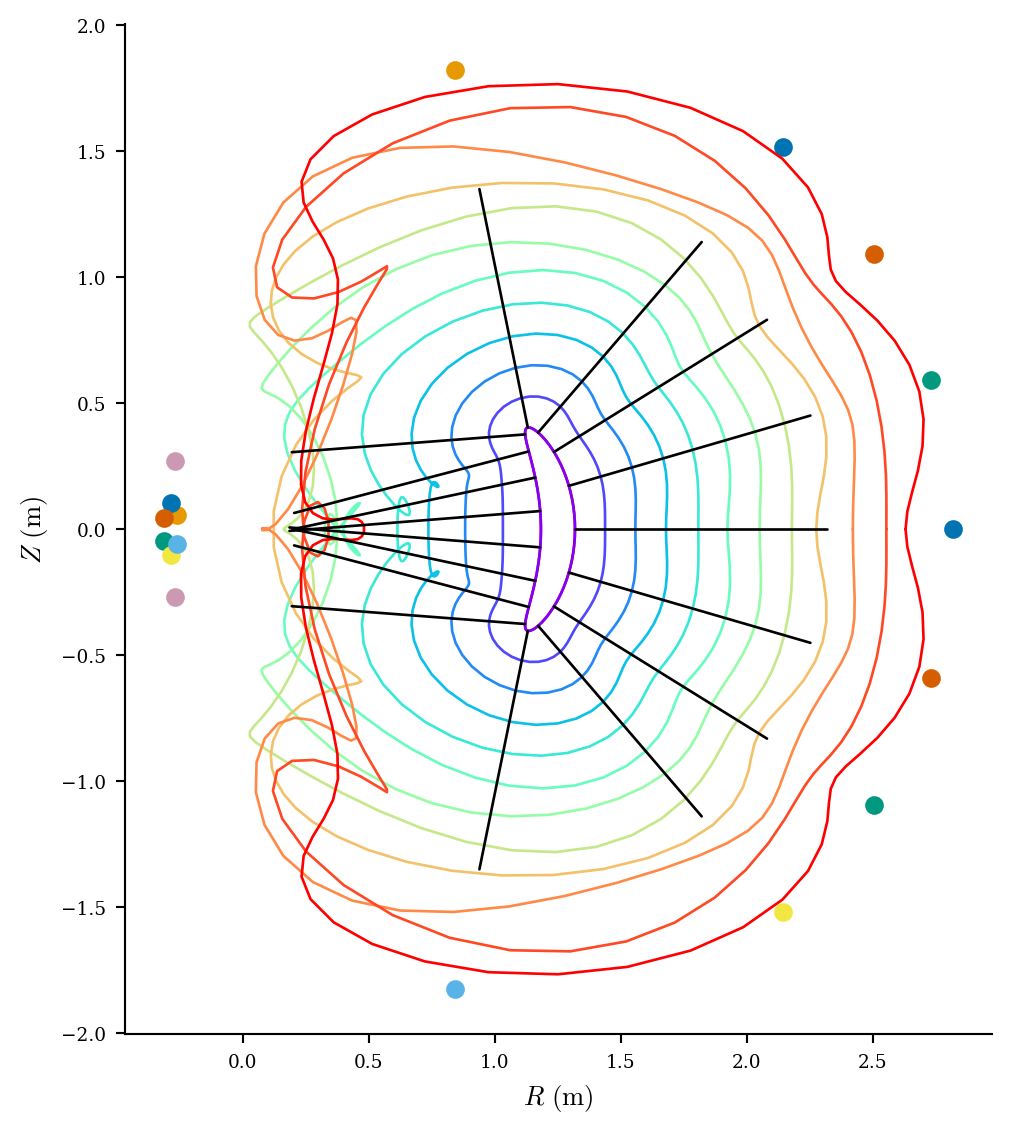

In [185]:
from desc.plotting import plot_3d, plot_boundaries
%config InlineBackend.figure_format = 'retina'

eq = desc.examples.get("precise_QA")
surface = eq.surface

# surfaces = [surface.constant_offset_surface(x) for x in np.linspace(0.1, 0, 10)]
# plot_boundaries(surfaces)

# print(surface.M, surface.N)

offset_surfaces = [constant_offset_surface(
    eq,
    offset=x,
    M=8,  # Poloidal resolution of desired offset surface
    N=8,  # Toroidal resolution of desired offset surface
    grid=LinearGrid(M=16, N=16, NFP=eq.NFP, sym=False)
) for x in np.arange(12) / 8.0]


phi = 0.0
fig, ax1 = plot_boundary(surface, phi=phi)
plot_boundaries(offset_surfaces, ax=ax1, phi=phi)
ax1.legend().set_visible(False)

normals = surface.compute(["R", "Z", "n_rho", "curvature_k2_rho"], grid=LinearGrid(rho=[1.0], zeta=[phi], M=8, NFP=2))

for i in range(normals["R"].shape[0]):
    plt.plot([normals["R"][i], normals["R"][i] + normals["n_rho"][i,0]], [normals["Z"][i], normals["Z"][i] + normals["n_rho"][i,2]], c='k')
    plt.scatter(normals["R"][i] + normals["n_rho"][i,0] * 1.5 * (1.0 + 0.8 * np.maximum(data["curvature_k2_rho"][i], 0.0)), normals["Z"][i] + normals["n_rho"][i,2] * 1.5 * (1.0 + 0.8 * np.maximum(data["curvature_k2_rho"][i], 0.0)))

[0.         0.09666439 0.19332878 0.28999317 0.38665756 0.48332195
 0.57998634 0.67665073 0.77331511 0.8699795  0.96664389 1.06330828
 1.15997267 1.25663706 1.35330145 1.44996584 1.54663023 1.64329462
 1.73995901 1.8366234  1.93328779 2.02995218 2.12661657 2.22328095
 2.31994534 2.41660973 2.51327412 2.60993851 2.7066029  2.80326729
 2.89993168 2.99659607 3.09326046 3.18992485 3.28658924 3.38325363
 3.47991802 3.57658241 3.67324679 3.76991118 3.86657557 3.96323996
 4.05990435 4.15656874 4.25323313 4.34989752 4.44656191 4.5432263
 4.63989069 4.73655508 4.83321947 4.92988386 5.02654825 5.12321264
 5.21987702 5.31654141 5.4132058  5.50987019 5.60653458 5.70319897
 5.79986336 5.89652775 5.99319214 6.08985653 6.18652092]


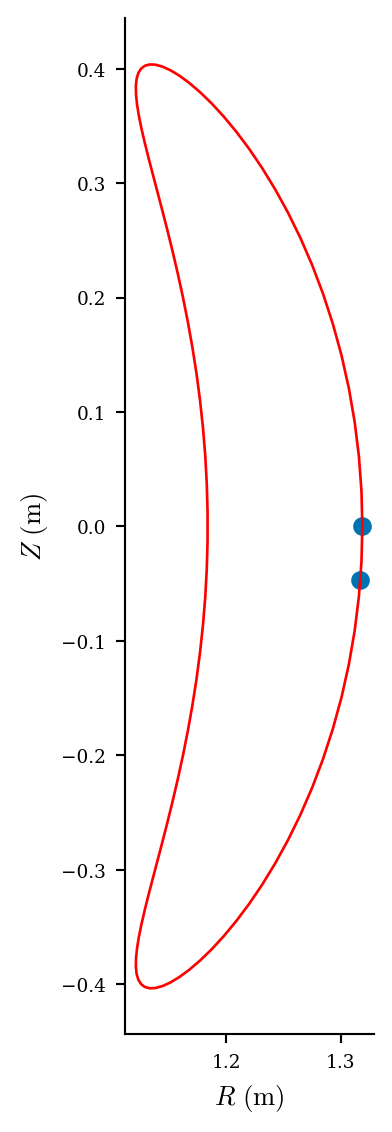

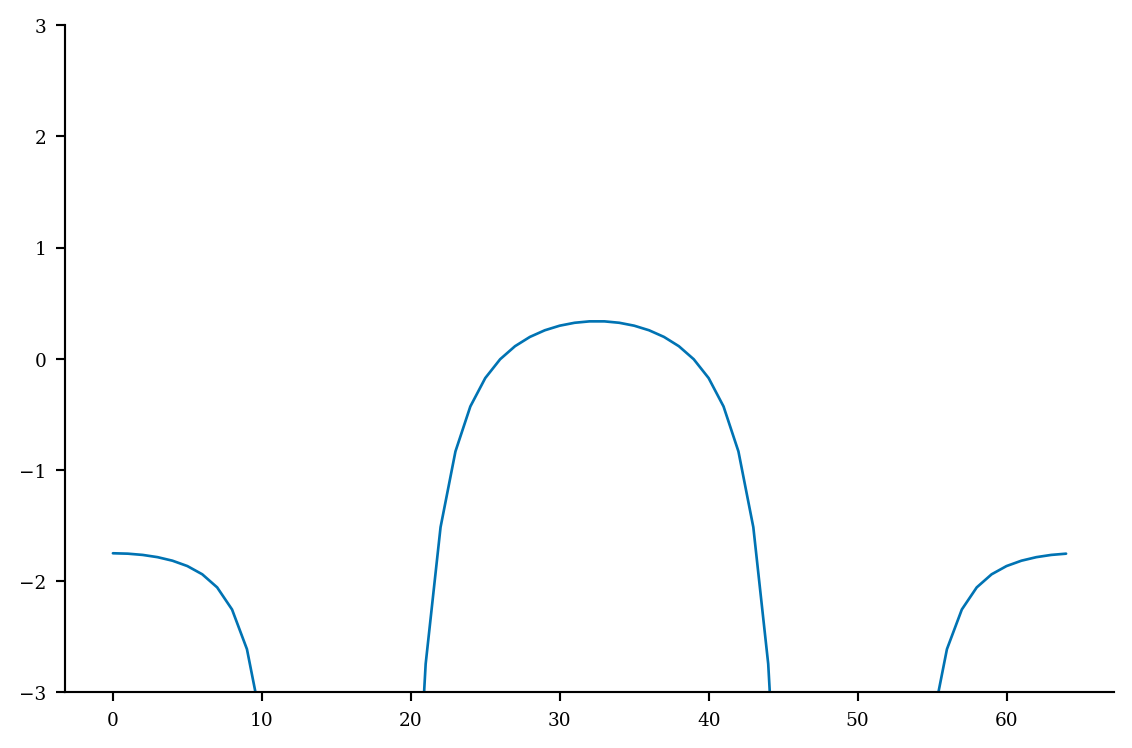

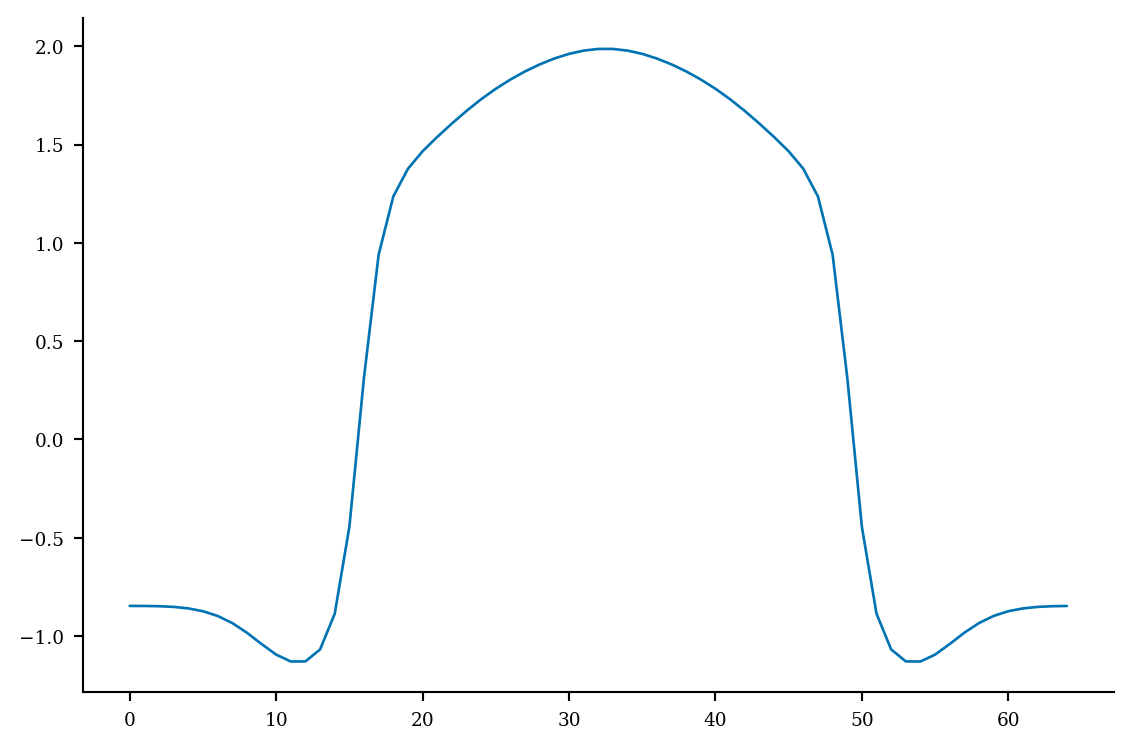

In [169]:
# fig, ax1 = plot_boundary(surface, phi=phi)

data = surface.compute(["R", "Z", "curvature_k2_rho", "curvature_k1_rho", "theta"], grid=LinearGrid(rho=[1.0], zeta=[phi], M=32, NFP=2))

print(data["theta"])
plot_boundary(surface, phi=0.0)
plt.gca().legend().set_visible(False)
plt.scatter(data["R"][:2], data["Z"][:2])
plt.show()

plt.plot(data["curvature_k2_rho"])
plt.ylim(-3, 3)
plt.show()

plt.plot(data["curvature_k1_rho"])
# plt.ylim(-3, 3)
plt.show()